# Analyzing the Museu Etnològic de Barcelona (https://dhprojectupf.wordpress.com)

Here's the plotting of the data. We have collected 175 records of a total of 834 in the Museu Etnològic de Barcelona's online catalog (https://cataleg.museuetnologic.bcn.cat/).

Do not hesitate to edit our Excel database if you want to expand the project!

You'll find the necessary documentation in our GitHub repository: https://github.com/LGimenoDH/MEBAnalysis.

If you have any doubts, contact us through the website https://dhprojectupf.wordpress.com.

### Install the MEB Database

In [ ]:
# Firstly, install our Excel database and copy the file route here:

our_data = pd.read_excel("/content/MEB Database - Spain_Colonies.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
our_data

In [ ]:
# This is necessary since Geopandas library isn't installed by default in Colab.

!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 76.7 MB/s eta 0:00:00


In [ ]:
# We will use pandas for reading files and manipulating data frames,
# matplotlib for plotting

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for plotting the maps
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# We will use seaborn just to make our graphs look nicer out of the box
import seaborn as sns
sns.set()

In [ ]:
# Here's the code being used to generate the column plots or histograms:

import altair as alt
from google.colab import autoviz

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

In [ ]:
# Here's the specific Python language for the variables being studied (and other ones).

# The values of width and height (in pixels) can be modified, as well as the variables themselves.

country_chart = categorical_histogram(our_data, 'COUNTRY', width=600, height=200)
comm_chart = categorical_histogram(our_data, 'Location (Autonomous Community / Island)', width=600, height=200)
fun_chart = categorical_histogram(our_data, 'USE', width=600, height=200)
mat_chart = categorical_histogram(our_data, 'MATERIAL', width=600, height=400)
ingres_chart = categorical_histogram(our_data, 'ADMISSION METHOD', width=600, height=200)
dat_chart = categorical_histogram(our_data, 'DATE (Century)', width=600, height=200)
don_chart = categorical_histogram(our_data, 'DONOR OR SELLER', width=600, height=500)
or_chart = categorical_histogram(our_data, 'ORIGIN', width=600, height=200)

### Records per Country

In [ ]:
country_chart

alt.Chart(...)

### Records per Region, Autonomous Community (Spain) or Island (Philippines)

In [ ]:
comm_chart

alt.Chart(...)

### Most Common Materials

In [ ]:
mat_chart

alt.Chart(...)

### Most Common Use or Function

In [ ]:
fun_chart

alt.Chart(...)

Now, we check the most common use segregating the records from Spain and the colonial territories:

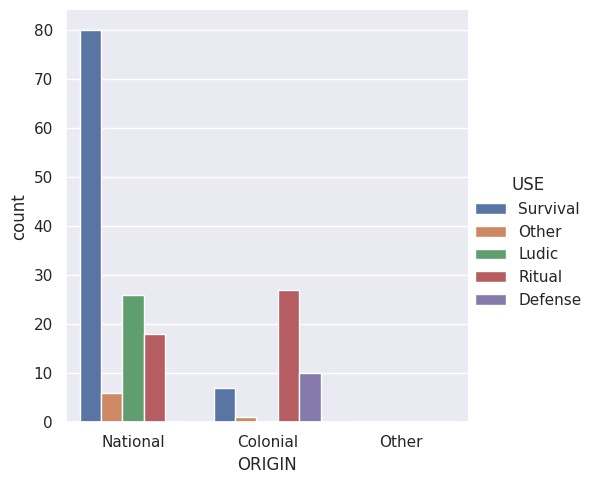

In [ ]:
sns.catplot(our_data, x="ORIGIN", hue="USE", kind="count")

### Most Common Admission Method

In [ ]:
ingres_chart

alt.Chart(...)



*   ***Bailment***: temporary donation of the piece
*   ***Donation***: piece given to the museum without profit
*   ***Purchase***: piece buyed by the museum
*   ***Storage***: the museum stores the piece, usually given by another museum
*   ***Unknown***: acquisition method not specified



### Which Families or Institutions Have a Clear Relationship with Colonial Art Collecting?

The following plot takes into account the total of 834 records available in the MEB catalog.

Only 130 have been retrieved from the national territory. Less than 50 have their origin in the colonial territories selected (Equatorial Guinea, the Philippines and Morocco). However the difference, it must be pointed out that the rest of records come from other international countries, not Spain.

Also, many of them have been retrieved from South America (which also was a colonial territory earlier in history, but we haven't considered it).

In consequence, more than 600 records are not from Barcelona, Catalunya nor Spain.

If those records were taken into consideration, we'd be closer to prove the museum appropriation problem in the case of the MEB.

In [ ]:
or_chart

alt.Chart(...)

In [ ]:
# This plot shows the names of the donors or sellers who have contributed to the MEB collection.
# In the x axis, we can check how many handcrafts each one has donated, sold or temporarily given to the museum.

don_chart

alt.Chart(...)

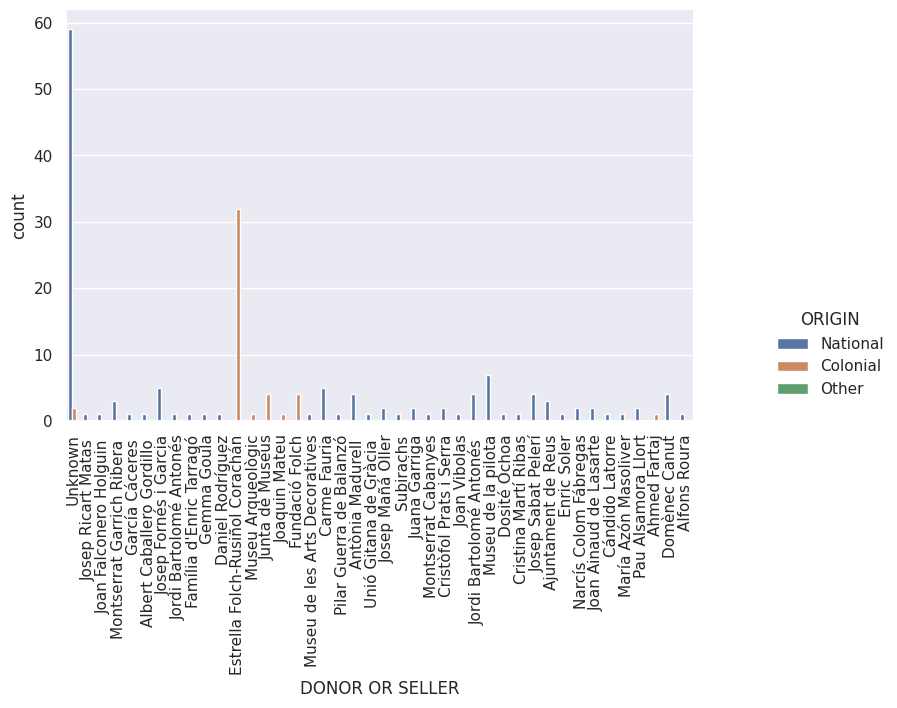

In [ ]:
# In this other plot, we segregate per color whether the handcraft pieces handed by the donors come from colonial (orange) or national territories (blue).

g = sns.catplot(our_data, x="DONOR OR SELLER", hue="ORIGIN", kind="count")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,5)

If we check the donors or sellers separating the ones who handed colonial handcrafts from the ones who handed national handcrafts, we find interesting results:

,RECORD,TYPOLOGY,USE,DATE (Century),MATERIAL,DONOR OR SELLER,ADMISSION METHOD,Location (City),Location (Region),Location (Autonomous Community / Island),COUNTRY,ORIGIN
24,MEB CF 6069,Adorn de cap,Ritual,XX,Vegetal fiber and others,Estrella Folch-Rusiñol Corachán,Bailment,NaN,Isabel,Luzon,Filipines,Colonial
25,MEB CF 5995,Buirac per a dards,Defense,XX,Wood and others,Estrella Folch-Rusiñol Corachán,Bailment,NaN,Palawan,Luzon,Filipines,Colonial
26,MEB CF 6123,Buirac per a dards,Defense,XX,Wood and others,Estrella Folch-Rusiñol Corachán,Bailment,NaN,Palawan,Luzon,Filipines,Colonial
27,MEB CF 6117,Contenidor cerimonial (punamhan),Ritual,XIX-XX,Wood,Estrella Folch-Rusiñol Corachán,Bailment,NaN,"Ifugao, La Cordillera",Luzon,Filipines,Colonial
28,MEB CF 5974,Cullerot,Survival,XIX-XX,Wood,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,Luzon,Filipines,Colonial
29,MEB CF 5945,Ornament de cinturó,Ritual,XX,Wood and others,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,Luzon,Filipines,Colonial
30,MEB CF 181,Guardià de reliquiari (eyema byeri),Ritual,XIX,Wood and metal,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,NaN,Guinea Equatorial,Colonial
31,MEB CF 184,Guardià de reliquiari (eyema byeri),Ritual,XIX-XX,Wood,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,NaN,Guinea Equatorial,Colonial
32,MEB CF 180,Guardià de reliquiari (eyema byeri),Ritual,XIX,Wood and metal,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,NaN,Guinea Equatorial,Colonial
33,MEB CF 169,Guardià de reliquiari (eyema byeri),Ritual,XIX,Wood,Estrella Folch-Rusiñol Corachán,Bailment,NaN,NaN,NaN,Guinea Equatorial,Colonial


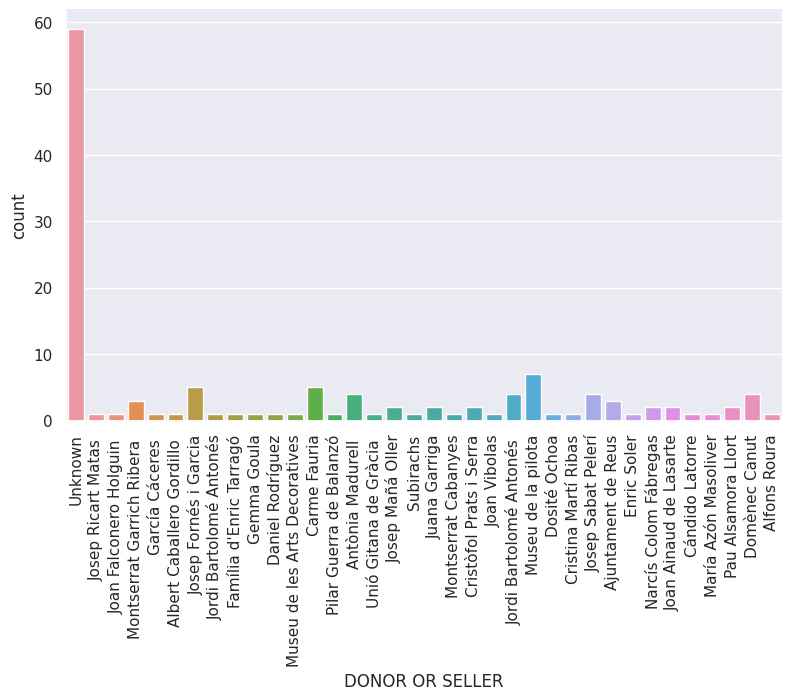

In [ ]:
# This histogram checks the national handcrafts donors only:

g = sns.catplot(our_data.loc[our_data['ORIGIN'] == 'National'], x="DONOR OR SELLER", kind="count")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,5)

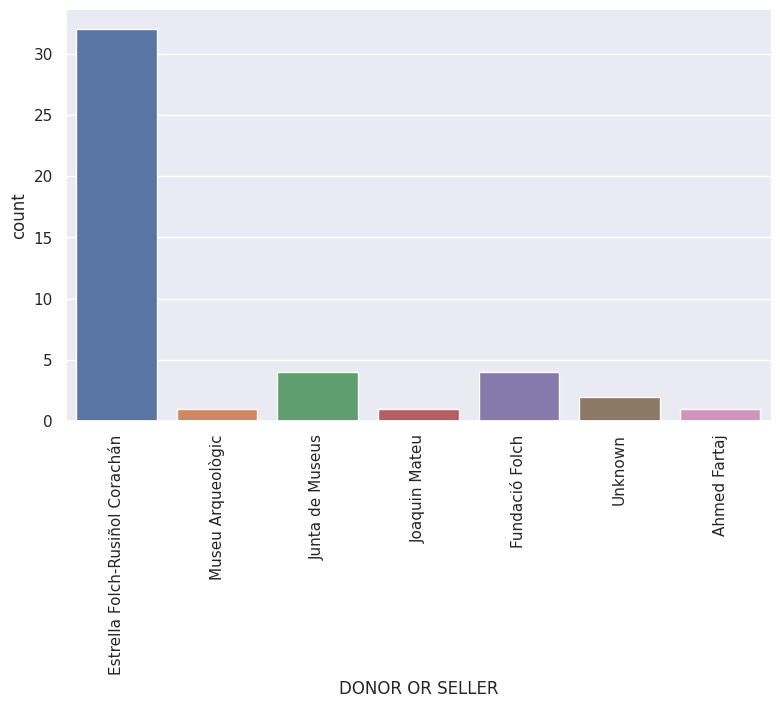

In [ ]:
# This other histogram depicts the few colonial handcraft donors:

g = sns.catplot(our_data.loc[our_data['ORIGIN'] == 'Colonial'], x="DONOR OR SELLER", kind="count")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,5)

### Location of the Handcrafted Pieces Analyzed

In [ ]:
# Finally, checking the provenance places we've generated a world map using Geopandas.

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-89-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
counts = our_data[["COUNTRY"]].value_counts()
counts.index = ['ESP', 'PHL', 'GNQ', 'MAR']

In [ ]:
world[['Counts']] = 0
for i in range(len(world)):
  if world.loc[i,'iso_a3'] in counts:
    world.loc[i, 'Counts'] = counts[world.loc[i,'iso_a3']]

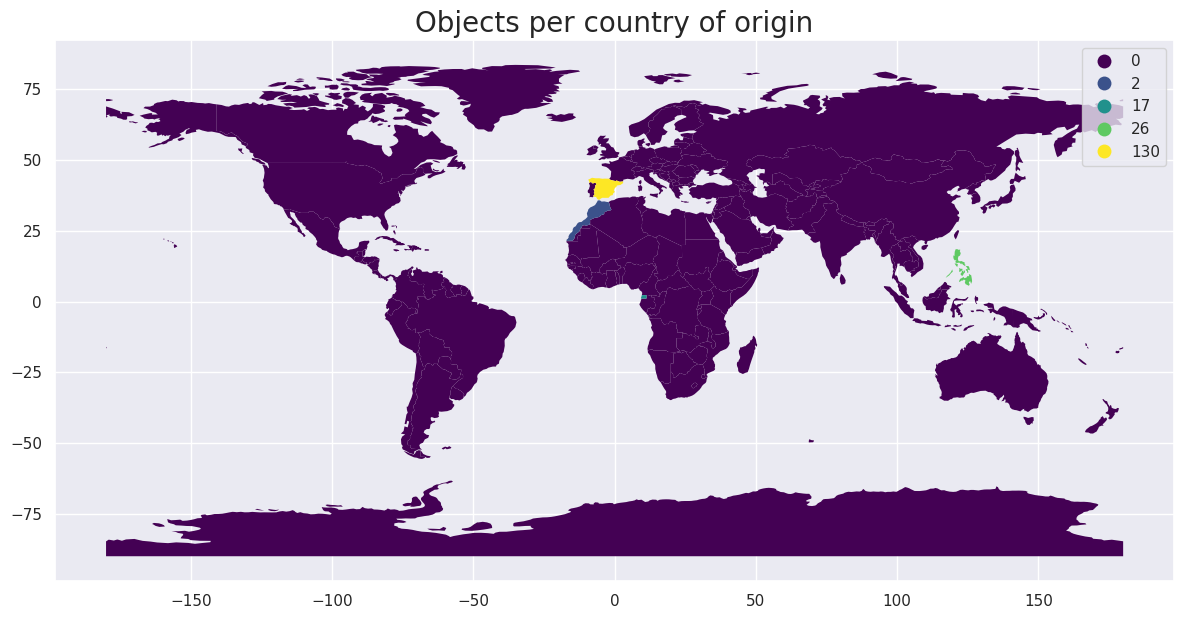

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12))
gdf = GeoDataFrame(world, geometry=world['geometry'])
gdf.plot(column='Counts', categorical=True, cmap="viridis", linewidth=0, legend=True, ax=ax)
ax.set_title('Objects per Country of Origin',fontsize=20)
plt.tight_layout()

# References

*   Lutz, M. 2013. *Learning Python*. Sebastopol, O'Reilly Media. <https://github.com/Quyaz/books/blob/master/Learning%20Python%2C%205th%20Edition.pdf>
*   VanderPlas, J. 2016. *Python Data Science Handbook*. O'Reilly Media.
<https://jakevdp.github.io/PythonDataScienceHandbook>

To conclude, we'd like to give credit to Jonas Gregorio for helping us with the coding language. **Thank you!**